In [7]:
import os
import numpy as np
import cv2 as cv

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Activation, LeakyReLU
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

### Load the dataset

In [2]:
X = [] # images
Y = [] # labels
for cls in range(10):
    class_path = f'cells_dataset/assets/{cls}'
    for img_id in os.listdir(class_path):
        img_path = class_path + '/' + img_id
        img = cv.imread(img_path)
        img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        X.append(img)
        Y.append(cls)

# the 0 class (empty cell) contains 18 images while the other classes contain ~ 380 samples each
# let's try to balance the dataset
for i in range(350):
    img_path = 'cells_dataset/assets/0/00.jpeg'
    img = cv.imread(img_path)
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    X.append(img)
    Y.append(0)
    
X = np.array(X) / 255  # normalize
Y = np.array(Y)

X = X.reshape((X.shape[0], 28, 28, 1)).astype('float32')  # reshape
Y = to_categorical(Y)  # one hot encoding

In [3]:
print(X.shape) # (3806, 28, 28, 1)
print(Y.shape) # (3806, 10)

(3806, 28, 28, 1)
(3806, 10)


### Split the dataset into test and train

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.1, shuffle=True)

print(X_train.shape) # (3425, 28, 28, 1)
print(X_test.shape)  # (381, 28, 28, 1)

(3425, 28, 28, 1)
(381, 28, 28, 1)


### Build the CNN

In [11]:
def create_model():
    cnn = Sequential()
    cnn.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1),
            activation='relu', padding='same'))
    cnn.add(MaxPooling2D((2, 2), padding='same'))
    cnn.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
    cnn.add(MaxPooling2D((2, 2), padding='same'))
    cnn.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
    cnn.add(MaxPooling2D((2, 2), padding='same'))
    cnn.add(Dropout(0.2))
    cnn.add(Flatten())
    cnn.add(Dense(128, activation='relu'))
    cnn.add(Dense(10, activation='softmax'))

    cnn.compile(loss=categorical_crossentropy,
            optimizer='adam', metrics=['accuracy'])
    # cnn.summary()
    return cnn
        
model = create_model()

### Train and store


In [12]:
batch_size = 4
epochs = 20

model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,
          verbose=1, validation_data=(X_test, Y_test))

model.save('saved_model/model.h5')

Epoch 1/20
857/857 [==============================] - 3s 4ms/step - loss: 1.5159 - accuracy: 0.4599 - val_loss: 0.5872 - val_accuracy: 0.7638
Epoch 2/20
857/857 [==============================] - 3s 3ms/step - loss: 0.4290 - accuracy: 0.8511 - val_loss: 0.2754 - val_accuracy: 0.8898
Epoch 3/20
857/857 [==============================] - 3s 3ms/step - loss: 0.2335 - accuracy: 0.9215 - val_loss: 0.1207 - val_accuracy: 0.9685
Epoch 4/20
857/857 [==============================] - 3s 3ms/step - loss: 0.1424 - accuracy: 0.9542 - val_loss: 0.0709 - val_accuracy: 0.9816
Epoch 5/20
857/857 [==============================] - 3s 3ms/step - loss: 0.1065 - accuracy: 0.9632 - val_loss: 0.0542 - val_accuracy: 0.9843
Epoch 6/20
857/857 [==============================] - 3s 3ms/step - loss: 0.1014 - accuracy: 0.9653 - val_loss: 0.0647 - val_accuracy: 0.9764
Epoch 7/20
857/857 [==============================] - 3s 3ms/step - loss: 0.0633 - accuracy: 0.9778 - val_loss: 0.0714 - val_accuracy: 0.9790
Epoch 

### Load and Inference

3/3 - 0s - loss: 0.0032 - accuracy: 1.0000 - 157ms/epoch - 52ms/step
Restored model, accuracy: 100.00%
3/3 [==============================] - 0s 3ms/step


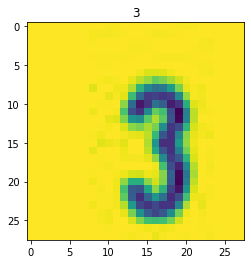

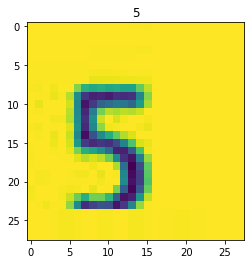

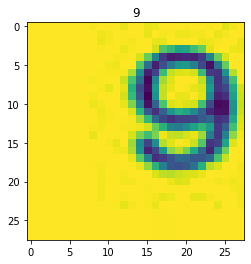

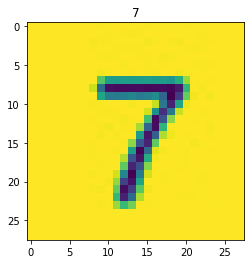

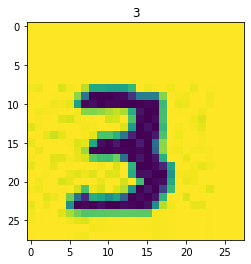

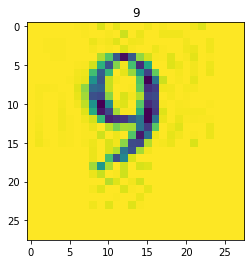

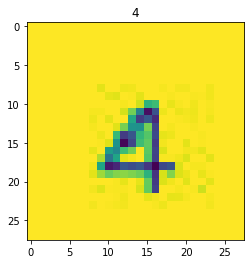

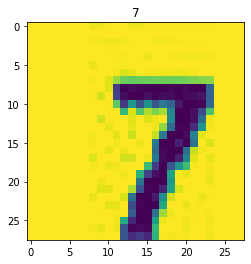

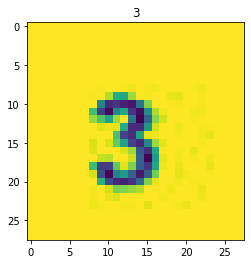

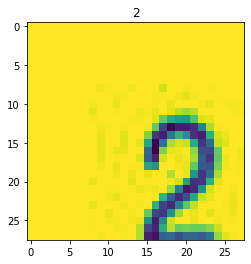

In [9]:
model = tf.keras.models.load_model('saved_model/model.h5')

loss, acc = model.evaluate(X_test, Y_test, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

pred = model.predict(X_test,verbose = 1)

import matplotlib.pyplot as plt

for i in range(10):
    plt.imshow(X_test[i])
    plt.title(np.argmax(pred[i]))
    plt.show()

